📝 Project: Classification on Password Strength Dataset

In this project, we work with a real-world dataset focused on password security. The dataset contains two columns:

password: a string containing the user’s password

strength: a label indicating the strength of the password (e.g., Weak, Medium, Strong, represented as 0, 1, 2)

Our goal is to build a machine learning pipeline—from data preprocessing and feature extraction to model training and evaluation—to classify the strength of a password based on its characteristics.

🎯 Objective

The main objective is to build and compare the performance of various classification models to accurately predict the strength of a given password. This classification helps in promoting strong password usage, enhancing cybersecurity awareness, and building tools that can automatically evaluate password quality.

The models evaluated include:

- Logistic Regression

- Naive Bayes

- Decision Tree

- Random Forest

- AdaBoost

- XGBoost

📊 Evaluation Metrics

We assess the performance of each model using the following metrics:

- Accuracy

- Precision

- Recall

- F1 Score

- Confusion Matrix

Outcome

By evaluating and comparing the models, we aim to select the most effective algorithm for predicting password strength. This project provides valuable insights for security-focused applications, enabling better user guidance and automated password evaluation systems.

In [60]:
import pandas as pd
import numpy as np
import re

In [61]:
import pandas as pd

clean_rows = []
with open("/Users/pravaliparvataneni/Downloads/data 2.csv", "r") as f:
    for line in f:
        parts = line.strip().split(",")
        if len(parts) == 2:  # Only keep rows with 2 parts (password, strength)
            clean_rows.append(parts)

In [62]:
# Step 2: Convert to DataFrame (skip the header row)
data = pd.DataFrame(clean_rows[1:], columns=["password", "strength"])

In [63]:
data.isna().sum()

password    0
strength    0
dtype: int64

In [64]:
data = data.dropna()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669640 non-null  object
 1   strength  669640 non-null  object
dtypes: object(2)
memory usage: 10.2+ MB


/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_3438/3117904843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='strength', data=data, palette={'0': "red", '1': "yellow", '2': "green"})


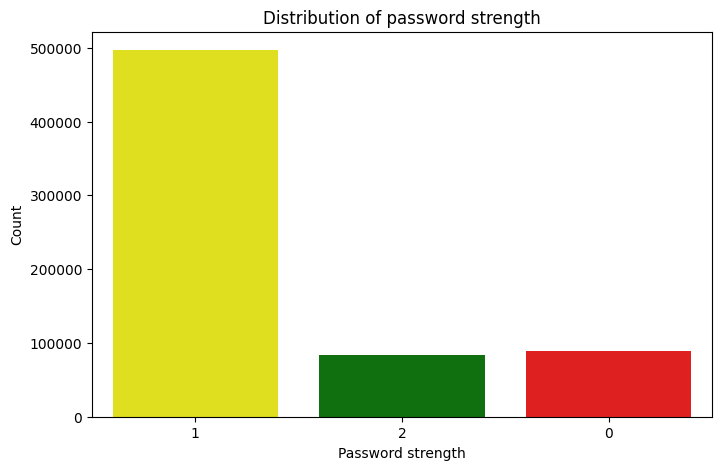

In [66]:
plt.figure(figsize=(8, 5))
sns.countplot(x='strength', data=data, palette={'0': "red", '1': "yellow", '2': "green"})
plt.title('Distribution of password strength')
plt.xlabel('Password strength')
plt.ylabel('Count')
plt.show()

In [67]:
# Step 3: Convert 'strength' column to integers
data["strength"] = data["strength"].astype(int)

In [68]:
# Step 4: Filter to keep only strength values 0, 1, or 2
data = data[data["strength"].isin([0, 1, 2])]

In [69]:
# Step 5: Define feature extraction function
def extract_features(pw):
    return {
        'length': len(pw),
        'has_digit': int(any(char.isdigit() for char in pw)),
        'has_upper': int(any(char.isupper() for char in pw)),
        'has_special': int(bool(re.search(r'[^A-Za-z0-9]', pw)))
    }

In [70]:
# Step 6: Apply feature extraction to each password
features = data['password'].apply(extract_features)
X = pd.DataFrame(features.tolist())
y = data['strength']

In [71]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_lr))


✅ Confusion Matrix:
 [[17833     0     0]
 [    0 99516     9]
 [    0     0 16570]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17833
           1       1.00      1.00      1.00     99525
           2       1.00      1.00      1.00     16570

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 0.9999327997132788


# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this value
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_knn))

✅ Confusion Matrix:
 [[17833     0     0]
 [    0 99525     0]
 [    0     0 16570]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17833
           1       1.00      1.00      1.00     99525
           2       1.00      1.00      1.00     16570

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


# Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred_nb = nb.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_nb))


✅ Confusion Matrix:
 [[    0 17516   317]
 [    0 97753  1772]
 [    0  1302 15268]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     17833
           1       0.84      0.98      0.90     99525
           2       0.88      0.92      0.90     16570

    accuracy                           0.84    133928
   macro avg       0.57      0.63      0.60    133928
weighted avg       0.73      0.84      0.78    133928


✅ Accuracy Score: 0.8438937339465982


/Users/pravaliparvataneni/tfenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pravaliparvataneni/tfenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pravaliparvataneni/tfenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

# SVM

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train SVM model
svm = SVC(kernel='linear', random_state=42)  # You can also try 'rbf' or 'poly'
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_svm))


✅ Confusion Matrix:
 [[17833     0     0]
 [    0 99525     0]
 [    0     0 16570]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17833
           1       1.00      1.00      1.00     99525
           2       1.00      1.00      1.00     16570

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_dt))


✅ Confusion Matrix:
 [[17833     0     0]
 [    0 99525     0]
 [    0     0 16570]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17833
           1       1.00      1.00      1.00     99525
           2       1.00      1.00      1.00     16570

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_rf))


✅ Confusion Matrix:
 [[17833     0     0]
 [    0 99525     0]
 [    0     0 16570]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17833
           1       1.00      1.00      1.00     99525
           2       1.00      1.00      1.00     16570

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


# AdaBoost

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train AdaBoost model
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)

# Predict
y_pred_ada = ab.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_ada))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_ada))


✅ Confusion Matrix:
 [[17833     0     0]
 [    0 99525     0]
 [    0     0 16570]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17833
           1       1.00      1.00      1.00     99525
           2       1.00      1.00      1.00     16570

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


# XGBoost

In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred_xgb))


/Users/pravaliparvataneni/tfenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:34:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Confusion Matrix:
 [[17833     0     0]
 [    0 99525     0]
 [    0     0 16570]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17833
           1       1.00      1.00      1.00     99525
           2       1.00      1.00      1.00     16570

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928


✅ Accuracy Score: 1.0


In [80]:
from sklearn.metrics import accuracy_score

accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}


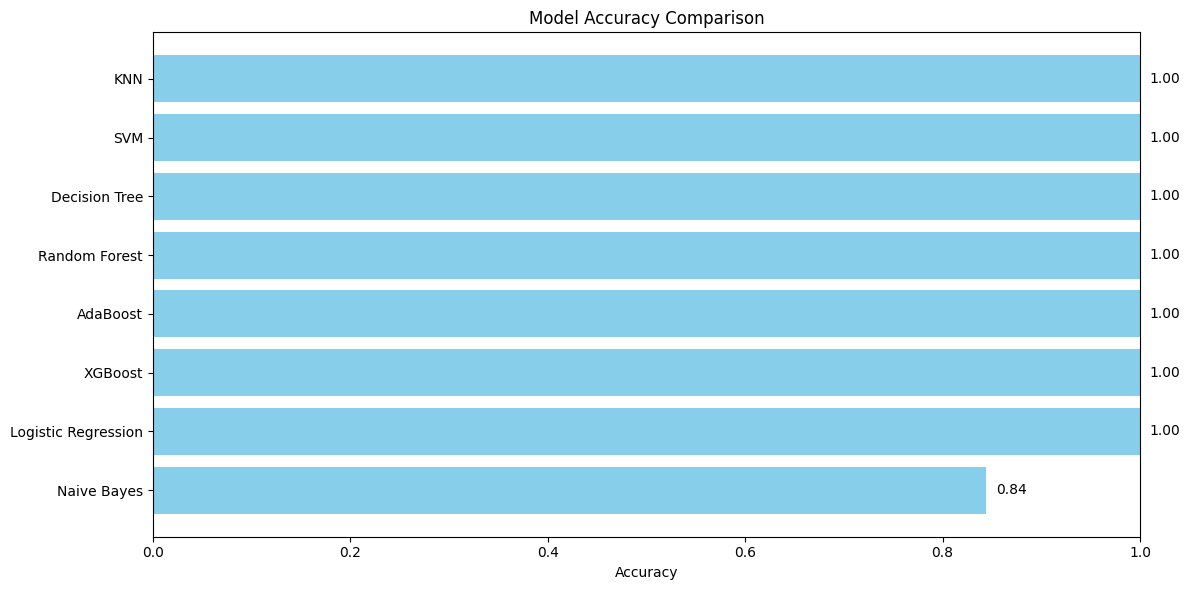

In [81]:
import matplotlib.pyplot as plt

# Sort by accuracy for better visualization
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(12, 6))
plt.barh(list(sorted_accuracies.keys()), list(sorted_accuracies.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
for index, value in enumerate(sorted_accuracies.values()):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.tight_layout()
plt.show()


- High Accuracy Models: KNN, SVM, Decision Tree, Random Forest, AdaBoost, XGBoost, and Logistic Regression all have an accuracy of 1.00, indicating that they are highly effective in classifying password strength.
- Lower Accuracy Model: Naive Bayes has an accuracy of 0.84, which is lower than the other models but still relatively high.
- Model Selection: Based on the graph, it appears that any of the top seven models (KNN, SVM, Decision Tree, Random Forest, AdaBoost, XGBoost, or Logistic Regression) would be suitable for classifying password strength, as they all have perfect accuracy.